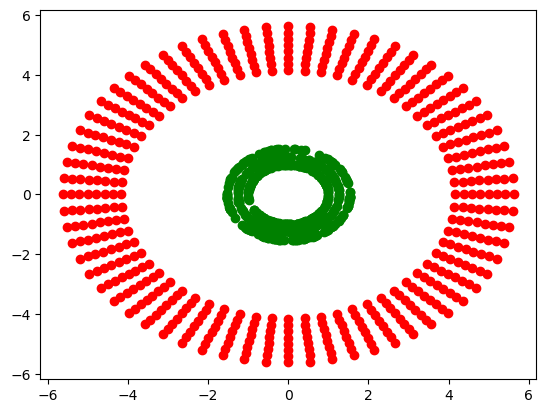

In [3]:
#p5.2.1 - Using Hand-crafted Features

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/kmeans_data.txt')
trans_data = (np.sum(np.square(data), axis=1)).reshape(-1, 1)
mu = trans_data[:2, :]
cl = np.argmin(np.sum((trans_data - np.transpose(mu).reshape(2, 1, -1)) ** 2, axis=2), axis=0).reshape(-1, 1)


for i in range(10):
    mu = np.array([np.mean(trans_data[cl.flatten() == k], axis=0) for k in range(mu.shape[0])])
    cl = np.argmin(np.sum((trans_data - np.transpose(mu).reshape(2, 1, -1)) ** 2, axis=2), axis=0).reshape(-1, 1)

p_cl = (cl == 1).reshape(cl.shape[0])
n_cl = (cl == 0).reshape(cl.shape[0])
plt.scatter(data[p_cl, 0], data[p_cl, 1], c='r')
plt.scatter(data[n_cl, 0], data[n_cl, 1], c='g')
plt.show()


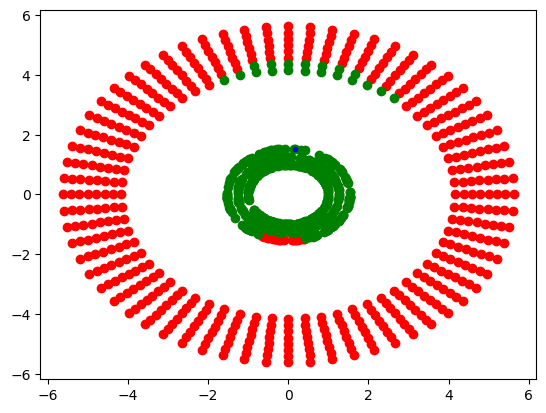

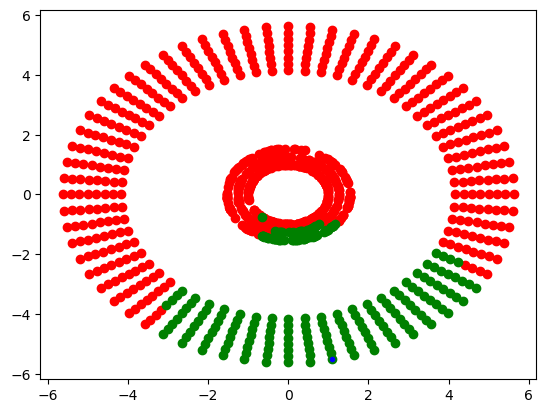

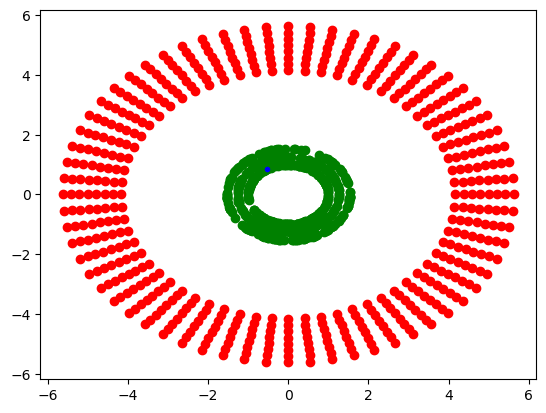

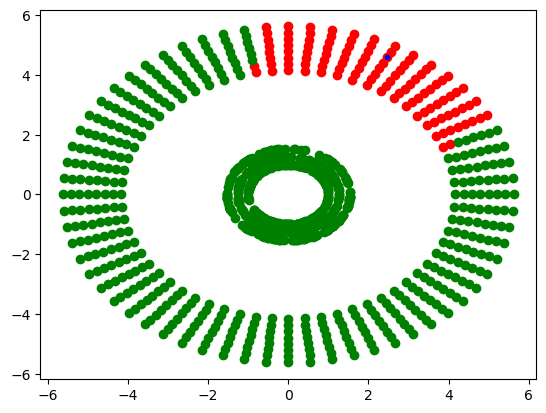

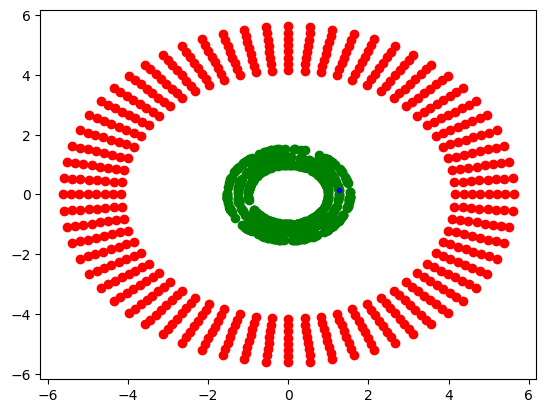

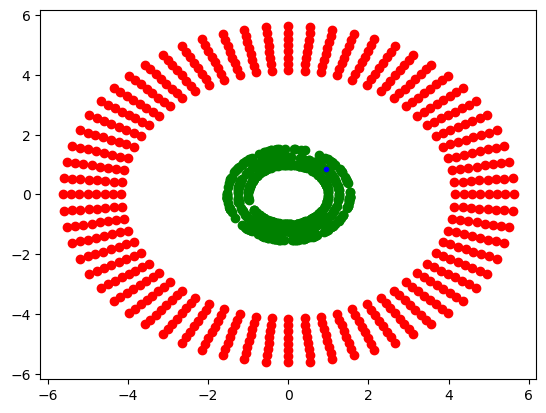

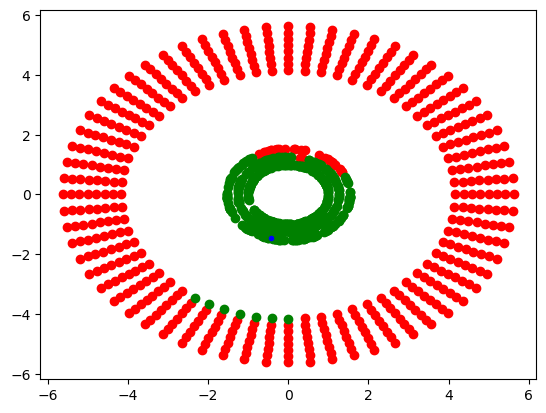

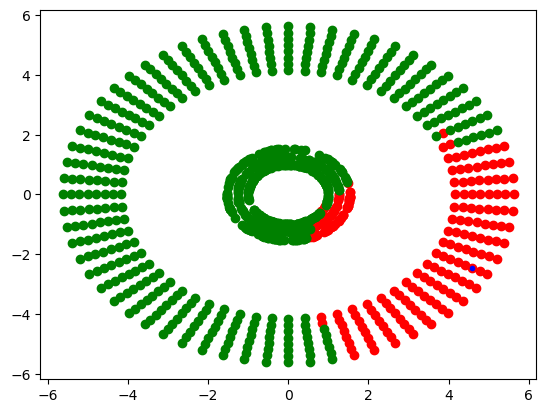

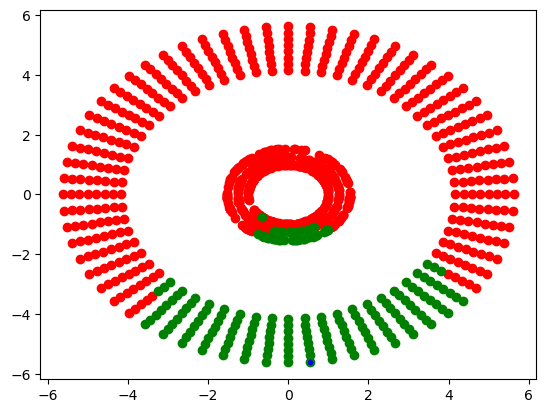

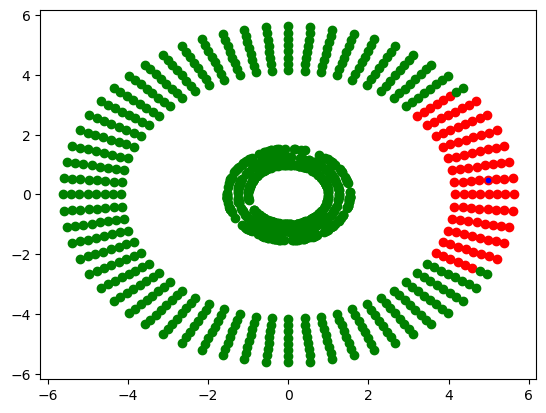

In [4]:
#problem - 5.2.2: Kernelized K-means

for i in range(10):
    z = np.random.randint(250, size=1).reshape(())
    ker_data = np.exp(-0.1 * np.sum(np.square(data - data[z, :].reshape((1, -1))), axis=1)).reshape(-1, 1)
    mu = ker_data[:2, :]
    cl = np.argmin(np.sum(np.square(ker_data - np.transpose(mu).reshape(2, 1, -1)), axis=2), axis=0).reshape(-1, 1)
    
    mu[0, :] = np.mean(ker_data[cl.flatten() == 0, :], axis=0)
    mu[1, :] = np.mean(ker_data[cl.flatten() == 1, :], axis=0)
    cl = np.argmin(np.sum(np.square(ker_data - np.transpose(mu).reshape(2, 1, -1)), axis=2), axis=0).reshape(-1, 1)

    p_cl = (cl == 1).reshape(cl.shape[0])
    n_cl = (cl == 0).reshape(cl.shape[0])
    plt.figure()
    plt.scatter(data[p_cl, 0], data[p_cl, 1], c='r')
    plt.scatter(data[n_cl, 0], data[n_cl, 1], c='g')
    plt.plot(data[z, 0], data[z, 1], 'b.')

plt.show()